Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
# These will be your typical imports for just about any pandas project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-13 20:22:58--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.82.163
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.82.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  97.1MB/s    in 2.0s    

2020-05-13 20:23:00 (97.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [10]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [11]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [12]:
! ls *.csv

aisles.csv	 order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


In [13]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [14]:
# How is this one different? Does it have anything we need?
# We need most of these columns, except 'days_since_prior_order' and 'eval_set'
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.sample(3)

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2460911,2743915,148116,prior,17,4,17,19.0
2090970,230191,125721,prior,29,1,15,7.0
1908167,1548536,114570,prior,31,4,19,9.0


In [15]:
# And products? We need 'product_name' and 'product_id'
products = pd.read_csv('products.csv')
print(products.shape)
products.sample(3)

(49688, 4)


,product_id,product_name,aisle_id,department_id
43202,43203,Creamy Avocado Poblano Dressing,89,13
15430,15431,Danimals Squeezables Lowfat Yogurt Cotton Cand...,120,16
1418,1419,Spring Vanilla Cup Cake,61,19


In [16]:
pd.read_csv('order_products__prior.csv').head(3)
pd.read_csv('order_products__train.csv').head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [17]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

Filtering: Get a subset of orders

From orders dataframe:

    user_id
    order_id
    order_number
    order_dow
    order_hour_of_day



In [18]:
# let's filter this dataframe to just the columns we need.
cols=['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders = orders[cols]
orders.head(3)

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12


In [19]:
# Now let's filter it to only certain rows. This will result in a series of boolean values.
condition = (orders['user_id']==1)
condition

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [20]:
print(orders[condition].shape)
print(orders.shape)
orders[condition]


(11, 5)
(3421083, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15
5,1,3367565,6,2,7
6,1,550135,7,1,9
7,1,3108588,8,1,14
8,1,2295261,9,1,16
9,1,2550362,10,4,8


In [21]:
# a more complicated condition.
condition_b = (orders['user_id']==1) & (orders['order_number'] <= 2)
condition_b

0           True
1           True
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Length: 3421083, dtype: bool

In [22]:
# Turn that filtered dataframe into its own dataframe.
orders_subset = orders[condition_b]
print(orders_subset.shape)
orders_subset

(2, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


Concatenate order_products__prior and order_products__train


In [0]:
# read in the datasets
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')

In [24]:
# check out their shape.
print(order_products__prior.shape)
print(order_products__train.shape)

(32434489, 4)
(1384617, 4)


In [27]:
# concatenate them together
order_products = pd.concat([order_products__prior, order_products__train], axis=0)
order_products.shape

(33819106, 4)

In [28]:
# Get a subset of `order_products` -- slim down this large dataset to only what I need (only 2 orders). 
condition_c = (order_products['order_id']==2539329) | (order_products['order_id']==2398795)
condition_c

0          False
1          False
2          False
3          False
4          False
           ...  
1384612    False
1384613    False
1384614    False
1384615    False
1384616    False
Name: order_id, Length: 33819106, dtype: bool

In [0]:
# Make a selection of columns
mycolumns = ['order_id', 'add_to_cart_order', 'product_id']

In [0]:
# Use the .loc method to filter rows and columns in a single blow.
order_products_subset = order_products.loc[condition_c, mycolumns]

In [31]:
# check it out
print(order_products_subset.shape)
order_products_subset

(11, 3)


,order_id,add_to_cart_order,product_id
22742744,2398795,1,196
22742745,2398795,2,10258
22742746,2398795,3,12427
22742747,2398795,4,13176
22742748,2398795,5,26088
22742749,2398795,6,13032
24076664,2539329,1,196
24076665,2539329,2,14084
24076666,2539329,3,12427
24076667,2539329,4,26088


Merge dataframes

Merge the subset from orders with columns from order_products


In [32]:
# Both of these subsets are now quite small
print(order_products_subset.shape)
print(orders_subset.shape)

(11, 3)
(2, 5)


In [33]:
# what is their common key ('unique identifier')?
print(order_products_subset.columns)
print(orders_subset.columns)

Index(['order_id', 'add_to_cart_order', 'product_id'], dtype='object')
Index(['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')


In [0]:
# merge the two df's on the common key.
# the 'on' parameter indicates a specific column that is contained in both dataframes.
# we use it to look up and copy information from the two df's into a combined df.


Merge with columns from products


In [35]:
# Merge with columns from products using `pd.merge`
toastcrunch = pd.merge(orders_subset, order_products_subset,
                       on='order_id',
                       how='inner')
toastcrunch

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [40]:
# one more merge is needed! 
finaltoastcrunch = pd.merge(toastcrunch, products[['product_id', 'product_name']], 
                            how='inner',
                            on='product_id')
finaltoastcrunch

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


3.2 Instacart Dataset: melt and pivot_tables



Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list

    Half And Half Ultra Pasteurized
    Half Baked Frozen Yogurt



So, given a product_name we need to calculate its order_hour_of_day pattern.


In [0]:
# Read back in the datasets in their original form (no filters).
products = pd.read_csv('products.csv')

In [0]:
# orders
orders =pd.read_csv('orders.csv')

In [0]:
# the concat
order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')])

Subset and Merge

One challenge of performing a merge on this data is that the products and orders datasets do not have any common columns that we can merge on. Due to this we will have to use the order_products dataset to provide the columns that we will use to perform the merge.

In [0]:
# We only want the first two products.
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
# Subset the products dataframe to only those two.
condition_d = products['product_name'].isin(product_names)

In [48]:
# apply
products = products[condition_d]
products

,product_id,product_name,aisle_id,department_id
9291,9292,Half And Half Ultra Pasteurized,84,16
30667,30668,Half Baked Frozen Yogurt,37,1


In [49]:
# I need to associate the hour of the day with a specific product.
# There's no common key between the `products` and `orders` df's to merge them.
# But `order_products` allows me to join them (aka, the `join` table.)

froyo_cream = (products[['product_id', 'product_name']]
               .merge(order_products[['order_id', 'product_id']])
                      .merge(orders[['order_id', 'order_hour_of_day']]))
print(froyo_cream.shape)

(5978, 4)


In [50]:
froyo_cream

,product_id,product_name,order_id,order_hour_of_day
0,9292,Half And Half Ultra Pasteurized,64,16
1,9292,Half And Half Ultra Pasteurized,1883,11
2,9292,Half And Half Ultra Pasteurized,5625,9
3,9292,Half And Half Ultra Pasteurized,7765,14
4,9292,Half And Half Ultra Pasteurized,7906,9
...,...,...,...,...
5973,30668,Half Baked Frozen Yogurt,3322557,15
5974,30668,Half Baked Frozen Yogurt,3326481,18
5975,30668,Half Baked Frozen Yogurt,3353089,13
5976,30668,Half Baked Frozen Yogurt,3378210,16


In [51]:
froyo_cream.sample(13)

,product_id,product_name,order_id,order_hour_of_day
399,9292,Half And Half Ultra Pasteurized,455281,16
2278,9292,Half And Half Ultra Pasteurized,2666546,16
4864,30668,Half Baked Frozen Yogurt,2262289,10
5338,30668,Half Baked Frozen Yogurt,2826064,14
1686,9292,Half And Half Ultra Pasteurized,1987051,11
2486,9292,Half And Half Ultra Pasteurized,2899471,10
1378,9292,Half And Half Ultra Pasteurized,1623587,10
5531,30668,Half Baked Frozen Yogurt,3052112,22
3633,30668,Half Baked Frozen Yogurt,739782,17
1566,9292,Half And Half Ultra Pasteurized,1862043,10


In [52]:
product_names

['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
# Subset all of that one more time.
froyo = froyo_cream[froyo_cream['product_name']==product_names[0]]
cream = froyo_cream[froyo_cream['product_name']==product_names[1]]

3.3 Four ways to reshape and plot

1. value_counts

In [54]:
# How many orders included cream, in total and at each hour of the day?
cream['order_hour_of_day'].value_counts().sort_index()

0       6
1       1
2       1
4       1
5       4
6      25
7      95
8     323
9     480
10    429
11    292
12    200
13    213
14    215
15    222
16    218
17    111
18     56
19     28
20     32
21     23
22     12
23      8
Name: order_hour_of_day, dtype: int64

In [0]:
# Display that as percents rather than counts
cream_pct = cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

In [58]:
cream_pct

0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

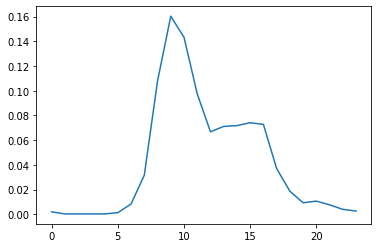

In [57]:
# Display that in a plot using Panda's built-in graphics library
cream_pct.plot();

# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [26]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# table2 -> tidy

In [0]:
# tidy -> table2

In [0]:
flights = sns.load_dataset('flights')

In [0]:
# Flights Pivot Table

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####